# Übung 3

In [908]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from numpy.polynomial import Polynomial

def target_function():
    return Polynomial((1, 2, -1, -2))


def get_data(sigma=0, N=5):
    np.random.seed(3)
    p = Polynomial((1, 2, -1, -2))
    x = np.sort(np.random.random_sample(size=N) * 2 - 1)
    noise = np.random.standard_normal(len(x))
    return x, p(x) + noise*sigma


X_3_1, y_3_1 = get_data()

In [909]:
print(X_3_1.shape)
print(y_3_1)

(5,)
[0.13500473 1.04282116 1.19077262 1.51499944 0.98337647]


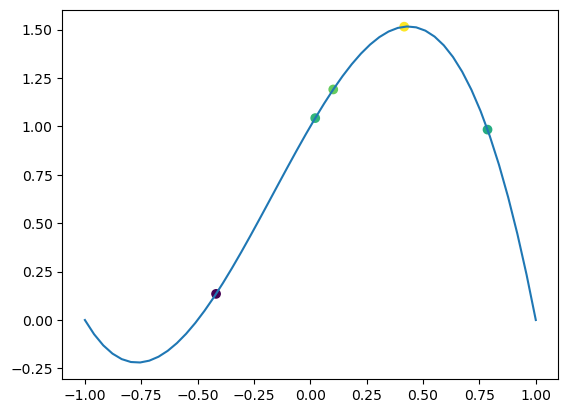

In [910]:
f = target_function()
plt.plot(np.linspace(-1,1),f(np.linspace(-1,1)))
plt.scatter(X_3_1,y_3_1,c=y_3_1)
plt.show()

Implementieren Sie dann eine Funktion `phi4`, die die nichtlineare Feature Transformation $$\Phi_4(x) = (x^1, x^2, x^3, x^4)$$ durchführt, also Daten $x$ entgegennimmt und die transformierten Features zurückgibt. Die zurückgegebene Datenmatrix wird die Dimension Nx4 haben, also N Datenpunkten mit je 4 Features zurückgeben.

In [911]:
def phi4(x):
    return np.array([x,x**2,x**3,x**4]).T

def lin_reg(X,y):
    x = np.column_stack((np.ones((X.shape[0],1)),X))
    x_inv = np.linalg.inv(x.T @ x) @ x.T
    return x_inv @ y


In [912]:
X_phi4 = phi4(X_3_1)
w_lin = lin_reg(X_phi4,y_3_1)
print(w_lin)

[ 1.00000000e+00  2.00000000e+00 -1.00000000e+00 -2.00000000e+00
 -7.35976822e-13]


(6) Implementieren Sie die Funktion `get_final_g`, die einen beliebigen nicht-transformierten $x$-Wert sowie den Gewichtsvektor $w_\text{lin}$ entgegennimmt und den Funktionswert $y$ zurückgibt.

In [913]:
def get_final_g(w):
    return Polynomial(w) 

(7) Visualisieren Sie in einem Plot in zwei unterschiedlichen Farben Ihre finale Hypothese (nutzen Sie dazu `get_final_g`) sowie die tatsächliche Target Function (nutzen Sie dazu `get_target_function`). Was stellen Sie fest?

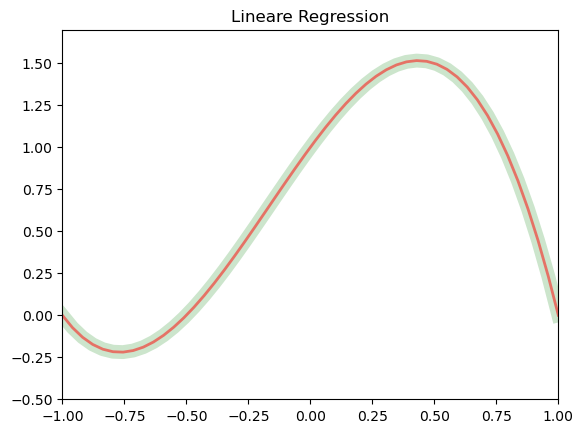

In [914]:
x_interval = np.linspace(-1,1)
plt.plot(x_interval,get_final_g(w_lin)(x_interval), c='green',linewidth=10, alpha=0.2)
plt.plot(x_interval,f(x_interval), c='red',linewidth=2, alpha=0.5)
plt.axis((-1, 1, -.5, 1.7))
plt.title("Lineare Regression")
plt.show()

### 3.2 Overfitting - Teil 1: Rauschkontamination

Overfitting ist eines der wichtigsten Konzepte im Machine Learning, und in dieser Übung werden Sie sich eingehender damit beschäftigen. Wir werden als Anschauungsobjekt *Polynomielle Regression* nutzen (aus Übung 3.1), um Overfitting zu untersuchen. Für die Bearbeitung benötigen Sie Ihren Code (oder Code Ihrer Kollegen) für lineare Regression sowie Code aus Übung 3.1.

Die Daten $\mathcal{D}$, mit denen wir arbeiten werden, wird Ihnen von der unten angegebenen Funktion `get_data` erzeugt.

**Ihre Aufgaben**

(1) Untersuchen Sie den unten dargestellten Datensatz: Visualisieren Sie in einem Plot die Target Function sowie zusätzlich im selben Plot die Daten, die Ihnen die Funktion `get_data` zur Verfügung stellt. Können Sie in Ihrem Plot erkennen, dass die Daten mit Rauschen kontaminiert sind?

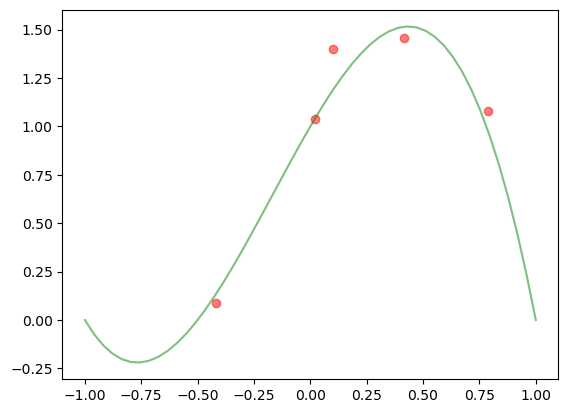

In [915]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from numpy.polynomial import Polynomial

def target_function_2():
    return Polynomial((1, 2, -1, -2))


def get_data_2(sigma=0, N=5):
    np.random.seed(3)
    p = Polynomial((1, 2, -1, -2))
    x = np.sort(np.random.random_sample(size=N) * 2 - 1)
    noise = np.random.standard_normal(len(x))
    return x, p(x) + noise*sigma


X_3_2, y_3_2 = get_data_2(N=5,sigma=.1)
f2 = target_function_2()
plt.scatter(X_3_2,y_3_2, c='red', alpha=0.5)
plt.plot(x_interval,f2(x_interval),c='green',alpha=0.5)

In [916]:
x_phi = phi4(X_3_2)
w_lin_new = lin_reg(x_phi,y_3_2)

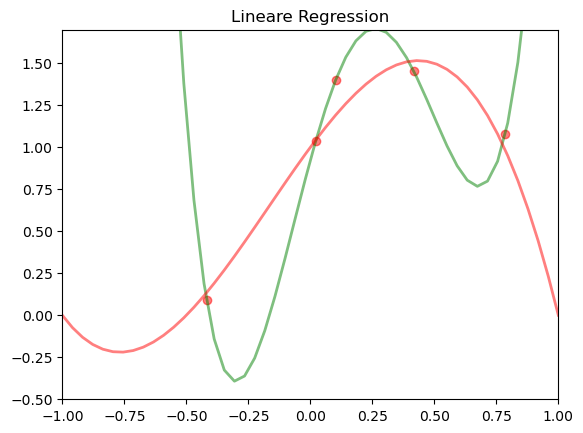

In [930]:
plt.plot(x_interval,get_final_g(w_lin_new)(x_interval), c='green',linewidth=2, alpha=0.5)
plt.plot(x_interval,f2(np.linspace(-1,1)), c='red',linewidth=2, alpha=0.5)
plt.scatter(X_3_2,y_3_2, c='red', alpha=0.5)
plt.axis((-1, 1, -.5, 1.7))
plt.title("Lineare Regression")
plt.show()

> **Erklärung**
- Die Ursache für das Phänomen ist die **Rauschkontamination** der Daten (statistische Kontamination), eine Abweichung zwischen Daten $\mathcal{D}$ vom zugrundeliegenden Target.
- Infolgedessen kommt es zu einem **Overfitting** der Daten. Der in-sample Error wird minimiert und die Daten dadurch perfekt approximiert, wenn wie in diesem Fall die Freiheitsgrade des Modells und/oder eine geringe Anzahl von Datenpunkten dies zulassen.
- Dies wiederum führt zu einem signifikanten out-of-sample Error, da die finale Hypothese den Target schlecht abbildet. Die Generalisierung ist sehr schlecht.

(5) Schreiben Sie eine Funktion, die den Fehler $E_\text{out}$ im Interval $x\in[-1, 1]$ Ihrer Hypothese ermittelt. Sei $y(x)$ der Wert der Target Function an der Stelle $x$ und sei $g(x)$ der Wert Ihrer finalen Hypothese an der Stelle $x$. Dann sei der Out-of-Sample Fehler $E_\text{out}$ im Interval $x\in[-1, 1]$ definiert als die mittlere quadratische Abweichung zwischen $g$ und $y$ in diesem Interval, 
$$E_\text{out} = \frac{1}{K}\sum_k (g(x_k) - y(x_k))^2$$ 
wobei wir hier $K=50$ Stützstellen $x_k$ wählen, die das Interval $[-1, 1]$ gleichmäßig in [äquidistanten Abständen abtasten](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html).

In [931]:
def e_out(y,g,interval,numsteps):
    x = np.linspace(interval[0],interval[1],numsteps,endpoint=True)
    return np.mean((g(x)-y(x))**2)

print(f"Out-of-Sample Error: {e_out(f,get_final_g(w_lin_new),[-1,1],50)}")

Out-of-Sample Error: 88.85794286785986


(6) Die Stärke der Kontamination mit Rauschen, die die Daten $\mathcal{D}$ erfahren, wird im Funktionsaufruf `get_data` mit dem Parameter `sigma` ($\sigma$) eingestellt. Je größer $\sigma$ gewählt wird, desto stärker die Rauschkontamination der Daten. Messen Sie den Out-of-Sample Fehler $E_\text{out}$ (wie in Schritt (5) formuliert) als Funktion von $\sigma$ ($\sigma\in\{0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1, 2\}$) und visualisieren Sie diesen Zusammenhang.

[1.38668391e-25 9.00140627e-05 9.00140627e-01 9.00140627e+01
 2.25035157e+03 9.00140627e+03 3.60056251e+04]


Text(0, 0.5, '$\\log\\,E_{out}$')

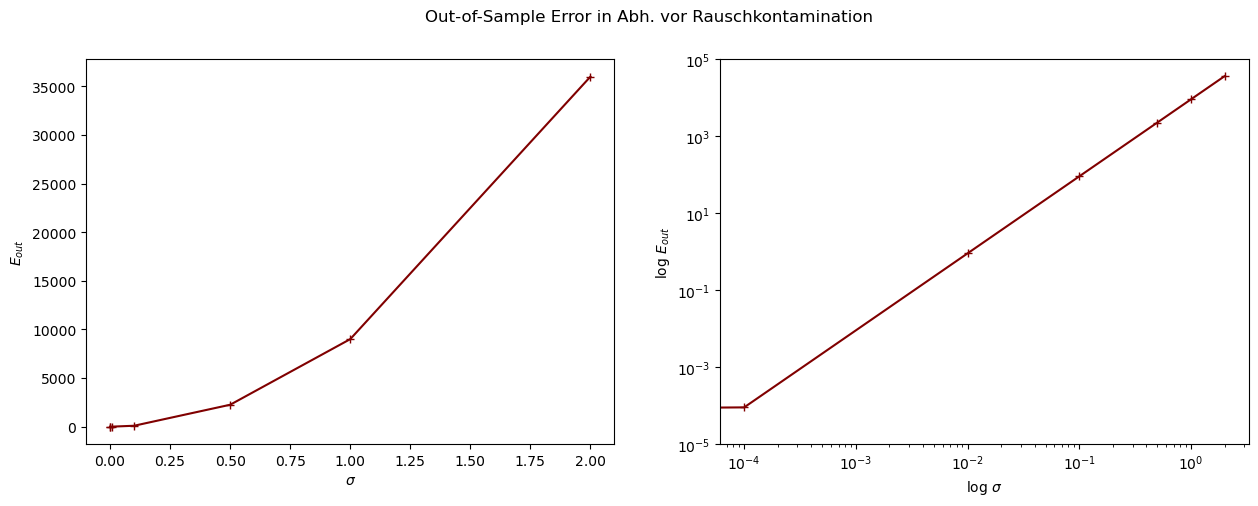

In [919]:
sigmas = np.array([0.0,0.0001,0.01,0.1,0.5,1.0,2.0])
e_outs = np.ndarray(sigmas.shape)

for index in range(len(sigmas)):
    X, y = get_data_2(N=5,sigma=sigmas[index])
    Phi = phi4(X)
    w_lin = lin_reg(Phi,y)
    # get err
    e_outs[index] = e_out(f2,get_final_g(w_lin),[-1,1],50)

print(e_outs)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 5))
fig.suptitle("Out-of-Sample Error in Abh. vor Rauschkontamination")  
ax1.plot( sigmas, e_outs, linestyle='-', marker='+', c='maroon')
ax1.set_xlabel(r"$\sigma$")
ax1.set_ylabel(r"$E_{out}$")
ax2.loglog( sigmas, e_outs, linestyle='-', marker='+', c='maroon')
ax2.set_ylim(10**(-5),10**5)
ax2.set_xlabel("$\log\,\sigma$")
ax2.set_ylabel("$\log\,E_{out}$")

### 3.3 Overfitting - Teil 2: Target Komplexität

**Ihre Aufgaben**

(1) Betrachten Sie die unten angegebene Code-Zeile und darin die neue Funktion `get_target_function`, die die Target Function implementiert. Die Target Function ist - wie in der Übung 3.2 - ein Polynom. Was passiert mit der Polynomordnung, wenn der Parameter `Qf` größer als 4 wird?

In [920]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from numpy.polynomial import Polynomial

def get_target_function(Qf=6):
    Q = 4 if Qf < 4 else Qf
    degrees = np.array([1, 2, -1, -2])
    if Q > 4:
        degrees = np.concatenate((degrees, np.ones(Q-4,)))
    return Polynomial(tuple(degrees))


def get_data(sigma=0, N=5, Qf=6):
    np.random.seed(3)
    p = get_target_function(Qf=Qf)
    x = np.sort(np.random.random_sample(size=N) * 2 - 1)
    noise = np.random.standard_normal(len(x))
    return x, p(x) + noise*sigma


X_3_3, y_3_3 = get_data(N=5, sigma=0, Qf=6)

> **Antwort** Für Qf>4 werden höhere Polynomterme eingefügt und jew. mit einem Koeffizienten 1 initialisiert. Die Polynomordnung steigt.

(2) Visualisieren Sie in einem Plot die Target Function sowie zusätzlich im selben Plot die Daten, die Ihnen die Funktion get_data zur Verfügung stellt. Sind Ihre Daten mit Rauschen kontaminiert?

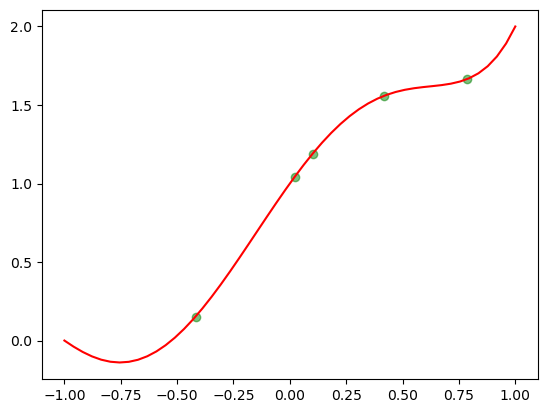

In [921]:
x, y = get_data()
f = get_target_function()

x_interval = np.linspace(-1,1,50)

plt.scatter(x,y,c='green',alpha=0.5)
plt.plot(x_interval, f(x_interval),c='red')
plt.show()

(3) Nutzen Sie Ihren Code aus Aufgabe 3.1, um die Featuredaten nichtlinear mithilfe von `phi4` zu transformieren. Führen Sie dann auf diesen transformierten Daten mithilfe Ihres Codes eine lineare Regression durch und erhalten Sie damit den Gewichtsvektor $w_\text{lin}$.

In [922]:
x_phi = phi4(x)

w_lin = lin_reg(x_phi,y)
print(w_lin)

[ 0.99969899  2.01724912 -1.15673253 -1.92324869  1.90725005]


(4) Visualisieren Sie mithilfe von `get_final_g` Ihre aus Schritt (3) ermittelte finale Hypothese sowie zusätzlich im selben Plot die Target Function. Was fällt Ihnen auf? Fokussieren Sie sich auf zwei Untersuchungen:
1. Beschreibt Ihre finale Hypothese Ihre Daten $\mathcal{D}$ gut oder schlecht?
2. Beschreibt Ihre finale Hypothese die Target Function gut oder schlecht?

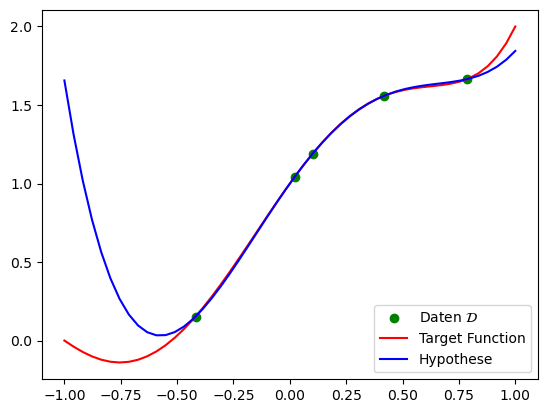

In [923]:
x_interval = np.linspace(-1,1,50)

plt.scatter(x,y,c='green', label="Daten $\mathcal{D}$")
plt.plot(x_interval, f(x_interval),c='red', label="Target Function")
plt.plot(x_interval, get_final_g(w_lin)(x_interval),c='blue', label="Hypothese")
plt.legend()
plt.show()

(5) Bestimmen Sie - wie in Übung 3.2 Schritt (5) den Out-of-Sample Fehler $E_\text{out}$ im Interval $x\in[-1, 1]$.

In [924]:
print(f"Out-of-Sample Error: {e_out(f,get_final_g(w_lin),[-1,1],50)}")

Out-of-Sample Error: 0.1530561205643051


(6) Wiederholen Sie Schritt (5) für Polynomordnungen $Q_f \in \{4, \ldots, 12\}$ und visualisieren Sie den Out-of-Sample Fehler $E_\text{out}$ als Funktion der Polynomordnung $Q_f$.

* Hinweis: Nutzen Sie in allen Ihren Experimenten dieselbe nichtlineare Featuretransformation `phi4`. 

e_outs=array([1.38668391e-25, 2.75261455e-25, 1.53056121e-01, 1.51709091e-01,
       5.77845267e-01, 5.40376059e-01, 1.09725082e+00, 1.04141223e+00,
       1.66688569e+00])


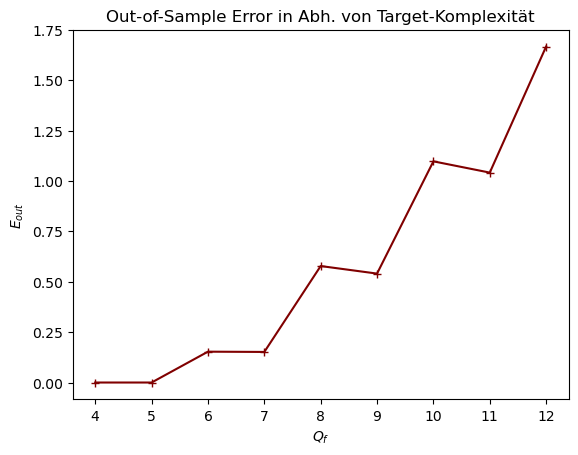

In [925]:
q = np.arange(4,13)
e_outs = np.ndarray(q.shape[0])

for i in range(len(q)):
    X, y = get_data(N=5,Qf=q[i])
    f = get_target_function(q[i])
    # do linreg
    Phi = phi4(X)
    w_lin = lin_reg(Phi,y)
    # get err
    e_outs[i] = e_out(f,get_final_g(w_lin),[-1,1],50)
    
plt.plot( q, e_outs, linestyle='-', marker='+', c='maroon')
plt.title("Out-of-Sample Error in Abh. von Target-Komplexität")
plt.xlabel(r"$Q_f$")
plt.ylabel(r"$E_{out}$")
print(f"{e_outs=}")


(7) **Nutzen Sie Begriffe aus der Vorlesung, um die Phänomene, die Sie in Schritt (6) beobachtet haben, zu beschreiben.** Nennen Sie die Ursache für das Phänomen, das Sie beobachtet haben.

> **Erklärung** Hier wurden Daten und Targetfunktion mit zunehmender Target-Komplexität ausgestattet, bei gleichbleibender Modellkomplexität, keine Rauschkontamination.
- Für Q_f < 6 approximiert das Modell Daten und Target optimal und hat daher, zumindest im untersuchten Intervall, sehr gute Generalisierung. Das liegt daran, dass die Datenqualität gut ist (Daten sind vollkommen kongruent mit Target-Funktion), die Datenpunkte sind wenige. Das Modell approximiert die wenigen Datenpunkte perfekt. Solange das Modell eine Komplexität besitzt, die größergleich der Target-Komplexität ist, führt die perfekte Approximation automatisch auch zu einer perfekten Generalisierung.
- Für Q_f >= 6 : Die Modell-Komplexität liegt unterhalb der des Targets und der daraus abgeleiteten Daten. Bei so wenigen Datenpunkten gelingt es die einzelnen Datenpunkte gut zu approximieren. Aber gute Generalisierung kann nicht erzielt werden, weil das Modell diese wenigen Datenpunkte overfittet und gleichzeitig nicht ausreichend Komplexität hat um die Targetkomplexität zu matchen.
- Der sich andeutende "Zick-Zack" des Kurvenverlaufs ist ein Symmetrie-Effekt. Das Modell kann geringfügig besser generalisieren, wenn Target- und Modell-Polynom in ihrer Symmetrie (un/gerader Polynomgrad) matchen.